# False Positive Threshold Experiment 

In [21]:
# Import Required Libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [22]:
#  Set Data Path
root_dir = Path("/opt/Neuro-Symbolic-Video-Frame-Search/store/nsvs_artifact/experiment_2.1_nsvs_ltl/")
clip_csv_dir = root_dir / "clip/false_positive_threshold_experiment_0_to_1"
dino_csv_dir = root_dir / "dino/false_positive_threshold_experiment"
yolo_csv_dir = root_dir / "yolo/false_positive_threshold_experiment"



In [23]:
# Get files from directory
clip_csv_files = sorted([f for f in os.listdir(clip_csv_dir) if f.startswith('conf_')])
dino_csv_files = sorted([f for f in os.listdir(dino_csv_dir) if f.startswith('conf_')])
yolo_csv_files = sorted([f for f in os.listdir(yolo_csv_dir) if f.startswith('conf_')])

# Header of the CSV file
header = ["dataset","ltl_group","ltl_formula","number_of_frame","cv_model","cv_model_weight","accuracy","precision","recall","f1_score","mapping_false_threshold","mapping_true_threshold","mapping_param_x0","mapping_param_k"]


In [24]:
# Concat Yolo Dataframe (YOLO)

# 1. read first csv file
yolo_df = pd.read_csv(yolo_csv_dir / yolo_csv_files[0])
yolo_df.columns = header

# 2. concat all csv files 
for file in yolo_csv_files[1:]:
    df = pd.read_csv(yolo_csv_dir / file)
    df.columns = header
    df = df.reindex(columns=header)  # Align columns with the master DataFrame
    yolo_df = pd.concat([yolo_df, df], ignore_index=True)
    yolo_df = yolo_df.dropna()

yolo_df.head(3)

,dataset,ltl_group,ltl_formula,number_of_frame,cv_model,cv_model_weight,accuracy,precision,recall,f1_score,mapping_false_threshold,mapping_true_threshold,mapping_param_x0,mapping_param_k
0,coco,prop1Uprop2,frisbeeUpizza,25,yolo,yolov8n,0.0000,0.0000,0.0000,0.0000,0.05,0.5,0.25,50
1,coco,prop1Uprop2,bedUtoilet,50,yolo,yolov8n,0.9091,0.9091,0.7692,0.8333,0.05,0.5,0.25,50
2,coco,prop1Uprop2,bananaUlaptop,25,yolo,yolov8n,1.0000,1.0000,0.1667,0.2857,0.05,0.5,0.25,50


In [25]:
# Concat Yolo Dataframe (DINO)

# 1. read first csv file
dino_df = pd.read_csv(dino_csv_dir / dino_csv_files[0])
dino_df.columns = header

# 2. concat all csv files 
for file in dino_csv_files[1:]:
    df = pd.read_csv(dino_csv_dir / file)
    df.columns = header
    df = df.reindex(columns=header)  # Align columns with the master DataFrame
    dino_df = pd.concat([dino_df, df], ignore_index=True)
    dino_df = dino_df.dropna()

dino_df.head(3)

,dataset,ltl_group,ltl_formula,number_of_frame,cv_model,cv_model_weight,accuracy,precision,recall,f1_score,mapping_false_threshold,mapping_true_threshold,mapping_param_x0,mapping_param_k
0,coco,prop1Uprop2,frisbeeUpizza,25,dino,dino,0.28,0.28,1.0,0.4375,0.05,0.5,0.25,50
1,coco,prop1Uprop2,bedUtoilet,50,dino,dino,0.26,0.26,1.0,0.4127,0.05,0.5,0.25,50
2,coco,prop1Uprop2,bananaUlaptop,25,dino,dino,0.24,0.24,1.0,0.3871,0.05,0.5,0.25,50


In [26]:
# Concat Yolo Dataframe (CLIP)

# 1. read first csv file
clip_df = pd.read_csv(clip_csv_dir / clip_csv_files[0])
clip_df.columns = header

# 2. concat all csv files 
for file in clip_csv_files[1:]:
    df = pd.read_csv(clip_csv_dir / file)
    df.columns = header
    df = df.reindex(columns=header)  # Align columns with the master DataFrame
    clip_df = pd.concat([clip_df, df], ignore_index=True)
    clip_df = clip_df.dropna()

clip_df.head(3)

,dataset,ltl_group,ltl_formula,number_of_frame,cv_model,cv_model_weight,accuracy,precision,recall,f1_score,mapping_false_threshold,mapping_true_threshold,mapping_param_x0,mapping_param_k
0,coco,prop1Uprop2,frisbeeUpizza,25,clip,clip,0.28,0.28,1.0,0.4375,0.05,0.5,0.25,50
1,coco,prop1Uprop2,bedUtoilet,50,clip,clip,0.26,0.26,1.0,0.4127,0.05,0.5,0.25,50
2,coco,prop1Uprop2,bananaUlaptop,25,clip,clip,0.24,0.24,1.0,0.3871,0.05,0.5,0.25,50


## Plotting

In [27]:
yolo_avg_accuracy= yolo_df.groupby('mapping_false_threshold')['accuracy'].mean()
dino_avg_accuracy= dino_df.groupby('mapping_false_threshold')['accuracy'].mean()
clip_avg_accuracy= clip_df.groupby('mapping_false_threshold')['accuracy'].mean()
yolo_avg_precision = yolo_df.groupby('mapping_false_threshold')['precision'].mean()
dino_avg_precision = dino_df.groupby('mapping_false_threshold')['precision'].mean()
clip_avg_precision = clip_df.groupby('mapping_false_threshold')['precision'].mean()


In [28]:
from scipy import stats

# Function to calculate confidence interval
def compute_confidence_interval(data, conf_interval=0.95):
    """
    Compute the confidence interval of the given data.
    
    Parameters:
    - data: A pandas Series or numpy array of the data
    
    Returns:
    - A tuple of (mean, lower bound of CI, upper bound of CI)
    """
    mean = np.mean(data)
    stderr = stats.sem(data)
    confidence_level = conf_interval
    interval = stderr * stats.t.ppf((1 + confidence_level) / 2., len(data) - 1)
    return mean, mean - interval, mean + interval

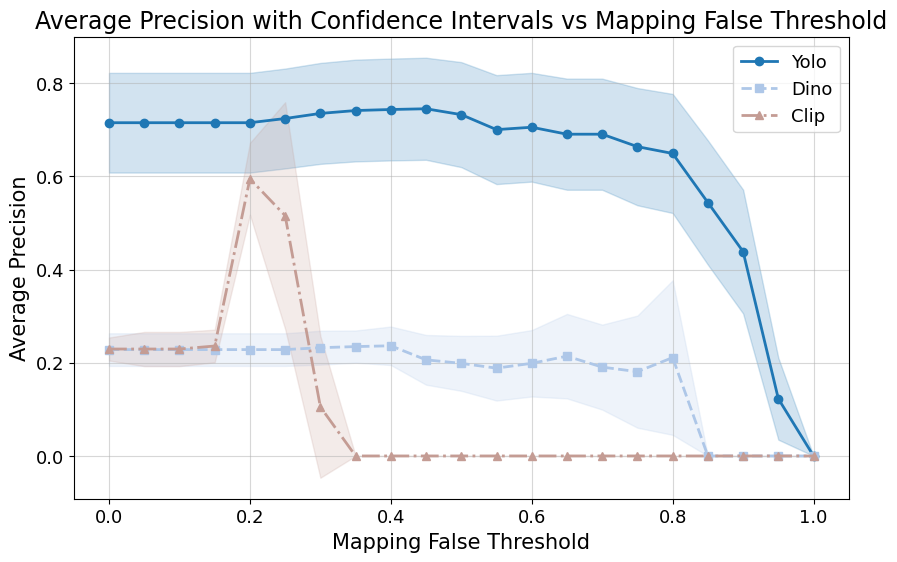

In [29]:

# Calculating the confidence intervals for each model and mapping_false_threshold
yolo_confidence_intervals = yolo_df.groupby('mapping_false_threshold')['precision'].apply(compute_confidence_interval)
dino_confidence_intervals = dino_df.groupby('mapping_false_threshold')['precision'].apply(compute_confidence_interval)
clip_confidence_intervals = clip_df.groupby('mapping_false_threshold')['precision'].apply(compute_confidence_interval)

# Plotting the data with confidence intervals
fig, ax = plt.subplots(figsize=(10,6))

# Plotting for yolo with confidence intervals
mean, lower, upper = zip(*yolo_confidence_intervals)
ax.plot(yolo_avg_precision.index, mean, marker='o', linestyle='-', label='Yolo', linewidth=2, color='#1f77b4')
ax.fill_between(yolo_avg_precision.index, lower, upper, color='#1f77b4', alpha=0.2)

# Plotting for dino with confidence intervals
mean, lower, upper = zip(*dino_confidence_intervals)
ax.plot(dino_avg_precision.index, mean, marker='s', linestyle='--', label='Dino', linewidth=2, color='#aec7e8')
ax.fill_between(dino_avg_precision.index, lower, upper, color='#aec7e8', alpha=0.2)

# Plotting for clip with confidence intervals
mean, lower, upper = zip(*clip_confidence_intervals)
ax.plot(clip_avg_precision.index, mean, marker='^', linestyle='-.', label='Clip', linewidth=2, color='#c49c94')
ax.fill_between(clip_avg_precision.index, lower, upper, color='#c49c94', alpha=0.2)

# Adding labels and title with increased font size
ax.set_xlabel('Mapping False Threshold', fontsize=15)
ax.set_ylabel('Average Precision', fontsize=15)
ax.set_title('Average Precision with Confidence Intervals vs Mapping False Threshold', fontsize=17)

# Increasing tick font size
ax.tick_params(axis='both', which='major', labelsize=13)

# Adding a legend to differentiate the lines with increased font size
ax.legend(fontsize=13)

# Displaying the grid with reduced alpha
ax.grid(True, alpha=0.5)

# Display the enhanced plot with confidence intervals
plt.show()


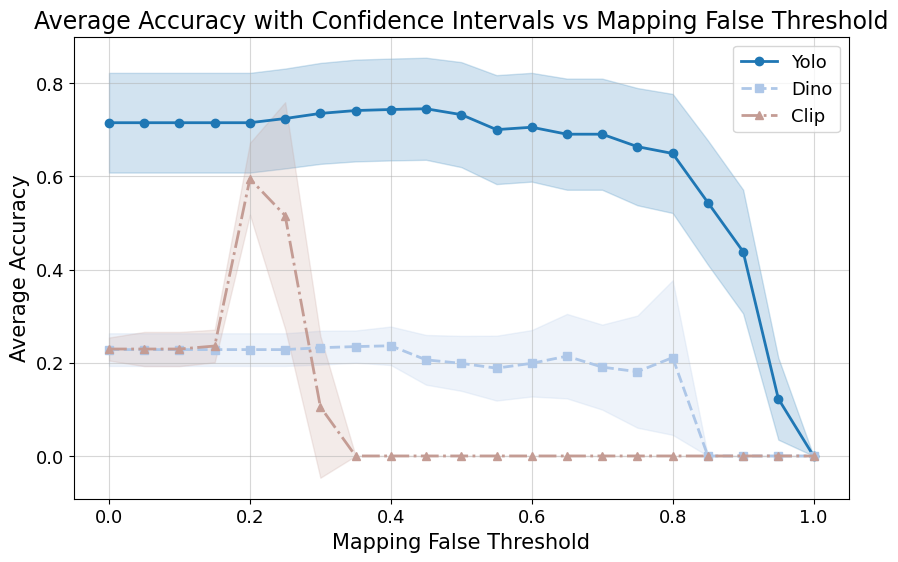

In [30]:
from scipy import stats

# Calculating the confidence intervals for each model and mapping_false_threshold
yolo_confidence_intervals = yolo_df.groupby('mapping_false_threshold')['accuracy'].apply(compute_confidence_interval)
dino_confidence_intervals = dino_df.groupby('mapping_false_threshold')['accuracy'].apply(compute_confidence_interval)
clip_confidence_intervals = clip_df.groupby('mapping_false_threshold')['accuracy'].apply(compute_confidence_interval)

# Plotting the data with confidence intervals
fig, ax = plt.subplots(figsize=(10,6))

# Plotting for yolo with confidence intervals
mean, lower, upper = zip(*yolo_confidence_intervals)
ax.plot(yolo_avg_accuracy.index, mean, marker='o', linestyle='-', label='Yolo', linewidth=2, color='#1f77b4')
ax.fill_between(yolo_avg_accuracy.index, lower, upper, color='#1f77b4', alpha=0.2)

# Plotting for dino with confidence intervals
mean, lower, upper = zip(*dino_confidence_intervals)
ax.plot(dino_avg_accuracy.index, mean, marker='s', linestyle='--', label='Dino', linewidth=2, color='#aec7e8')
ax.fill_between(dino_avg_accuracy.index, lower, upper, color='#aec7e8', alpha=0.2)

# Plotting for clip with confidence intervals
mean, lower, upper = zip(*clip_confidence_intervals)
ax.plot(clip_avg_accuracy.index, mean, marker='^', linestyle='-.', label='Clip', linewidth=2, color='#c49c94')
ax.fill_between(clip_avg_accuracy.index, lower, upper, color='#c49c94', alpha=0.2)

# Adding labels and title with increased font size
ax.set_xlabel('Mapping False Threshold', fontsize=15)
ax.set_ylabel('Average Accuracy', fontsize=15)
ax.set_title('Average Accuracy with Confidence Intervals vs Mapping False Threshold', fontsize=17)

# Increasing tick font size
ax.tick_params(axis='both', which='major', labelsize=13)

# Adding a legend to differentiate the lines with increased font size
ax.legend(fontsize=13)

# Displaying the grid with reduced alpha
ax.grid(True, alpha=0.5)

# Display the enhanced plot with confidence intervals
plt.show()


In [13]:
clip_0_2_df_avg_precision

mapping_false_threshold
0.20    0.594711
0.21    0.619963
0.22    0.685016
0.23    0.690911
0.24    0.711179
0.25    0.515789
0.26    0.515789
0.27    0.463158
0.28    0.421053
0.29    0.315789
0.30    0.105263
Name: precision, dtype: float64

In [14]:
clip_0_2_df_avg_accuracy

mapping_false_threshold
0.20    0.893889
0.21    0.758032
0.22    0.613263
0.23    0.503363
0.24    0.398332
0.25    0.257189
0.26    0.257189
0.27    0.170053
0.28    0.118426
0.29    0.062453
0.30    0.016374
Name: accuracy, dtype: float64

In [ ]:
from typing import Dict, List, Tuple, Union
def plot_overlaid_ts(
    normalized_ts_dict: Dict = None,
    title_str: str = None,
    ylabel: str = None,
    xlabel: str = "time",
    fontsize: float = 30,
    xticks=None,
    ylim=None,
    DEFAULT_ALPHA: float = 1.0,
    legend_present: bool = True,
    DEFAULT_MARKERSIZE: float = 15,
    delete_yticks: bool = False,
    ax=None,
) -> None:
    """Overlaid time series plot.
    
    :param normalized_ts_dict: dictionary with time series to plot
    :param title_str: title of the plot
    :param ylabel: y-axis label
    :param xlabel: x-axis label
    :param fontsize: font size
    :param xticks: x-axis ticks
    :param ylim: y-axis limits
    :param DEFAULT_ALPHA: default alpha value
    :param legend_present: whether to plot the legend
    :param DEFAULT_MARKERSIZE: default marker size
    :param delete_yticks: whether to delete the y-axis ticks
    :param ax: axis to plot on
    :return: None.
    """
    # dictionary:
    # key = ts_name, value is a dict, value = {'xvec': , 'ts_vector', 'lw', 'linestyle', 'color'}

    # Colors used in plots
    colors = [
        "denim blue",
        "medium green",
        "pale red",
        "amber",
        "greyish",
        "dusty purple",
    ]

    # Plot time series
    i = 0
    for ts_name, ts_data_dict in normalized_ts_dict.items():
        # Order of the line
        if "zorder" in ts_data_dict.keys():
            zorder = ts_data_dict["zorder"]
        else:
            zorder = None

        # Color of the line
        if "color" in ts_data_dict.keys():
            color = ts_data_dict["color"]
        else:
            color = sns.xkcd_rgb[colors[i]]

        # Alpha value of the line
        if "alpha" in ts_data_dict.keys():
            alpha = ts_data_dict["alpha"]
        else:
            alpha = DEFAULT_ALPHA

        # Plot with x-axis if xvec is specified
        if "xvec" in ts_data_dict.keys():
            # Plot with markers if marker is specified
            if "marker" in ts_data_dict.keys():
                ax.plot(
                    ts_data_dict["xvec"],
                    ts_data_dict["ts_vector"],
                    lw=ts_data_dict["lw"],
                    label=ts_name,
                    marker=ts_data_dict["marker"],
                    ls=ts_data_dict["linestyle"],
                    alpha=alpha,
                    ms=DEFAULT_MARKERSIZE,
                    color=color,
                    zorder=zorder,
                )
            else:
                ax.plot(
                    ts_data_dict["xvec"],
                    ts_data_dict["ts_vector"],
                    lw=ts_data_dict["lw"],
                    label=ts_name,
                    ls=ts_data_dict["linestyle"],
                    alpha=alpha,
                    color=color,
                    zorder=zorder,
                )
        # Plot without x-axis if xvec is not specified
        else:
            if "marker" in ts_data_dict.keys():
                ax.plot(
                    ts_data_dict["ts_vector"],
                    lw=ts_data_dict["lw"],
                    label=ts_name,
                    marker=ts_data_dict["marker"],
                    ls=ts_data_dict["linestyle"],
                    alpha=alpha,
                    ms=DEFAULT_MARKERSIZE,
                    color=color,
                    zorder=zorder,
                )
            else:
                ax.plot(
                    ts_data_dict["ts_vector"],
                    lw=ts_data_dict["lw"],
                    label=ts_name,
                    ls=ts_data_dict["linestyle"],
                    alpha=alpha,
                    color=color,
                    zorder=zorder,
                )

        i += 1

    set_axis_infos(
        ax,
        xlabel=xlabel,
        ylabel=ylabel,
        ylim=ylim,
        xticks=xticks,
        title_str=title_str,
    )

    # Plot legend
    if legend_present:
        ax.legend(loc="best")

    # Delete y-axis ticks if specified
    if delete_yticks:
        ax.set_yticks([])


In [ ]:

_X_DATA = np.arange(0, 1.05, 0.05)
_Y_CLIP_DF = clip_df.groupby("mapping_false_threshold")["precision"].mean().reset_index()
_Y_YOLO_DF = yolo_df.groupby("mapping_false_threshold")["precision"].mean().reset_index()
_Y_DINO_DF = dino_df.groupby("mapping_false_threshold")["precision"].mean().reset_index()

_DICT = {
    # "$x$": {
    #     "xvec": _X_DATA,
    #     "ts_vector": _X_DATA,
    #     "lw": 3.0,
    #     "linestyle": "-",
    #     "color": "b",
    # },
    "$y$": {
        "xvec": _X_DATA,
        "ts_vector": np.array(_Y_YOLO_DF["precision"]),
        "lw": 3.0,
        "linestyle": "-",
        "color": "r",
    },
    "$\\sin$": {
        "xvec": _X_DATA,
        "ts_vector": np.array(_Y_CLIP_DF["precision"]),
        "lw": 3.0,
        "linestyle": "-",
        "color": "g",
        "zorder": 2,
    },
    "$\\cos$": {
        "xvec": _X_DATA,
        "ts_vector": np.array(_Y_DINO_DF["precision"]),
        "lw": 3.0,
        "linestyle": "-",
        "color": "k",
        "zorder": 10,
    },
}
fig, ax = plt.subplots(figsize=(10, 10))
plot_overlaid_ts(
    normalized_ts_dict=_DICT,
    title_str="Overlaid Time Series Plot",
    ylabel="$y$",
    xlabel="$x$",
    fontsize=30,
    xticks=None,
    ylim=None,
    DEFAULT_ALPHA=1.0,
    legend_present=True,
    DEFAULT_MARKERSIZE=15,
    delete_yticks=False,
    ax=ax,
    )
plot_overlaid_ts()


In [ ]:
# Grouping by mapping_false_threshold and calculating the mean of precision for each group
grouped_df = df.groupby("mapping_false_threshold")["precision"].mean().reset_index()

# Create a Seaborn line plot with the grouped data
plt.figure(figsize=(10, 6))
sns.lineplot(x="mapping_false_threshold", y="precision", data=grouped_df, marker="o", markersize=8, linewidth=2.5, color='blue')

# Enhancing the plot aesthetics
plt.title('Mean Precision (w LTL) vs False Positive Threshold', fontsize=15)
plt.xlabel('Mapping False Threshold', fontsize=12)
plt.ylabel('Mean Precision', fontsize=12)
plt.grid(True)

# Set x-axis limits to be reversed
plt.xlim(0.2, 0.3)

# Display the plot
plt.show()


In [49]:
clip_0_2_0_3_csv_dir = Path("/opt/Neuro-Symbolic-Video-Frame-Search/store/nsvs_artifact/experiment_2.1_nsvs_ltl/clip/false_positive_threshold_experiment_0_2_to_0_3")
clip_0_2_0_3_csv_files = sorted([f for f in os.listdir(clip_0_2_0_3_csv_dir) if f.startswith('conf_')])
# Concat Yolo Dataframe (CLIP)

# 1. read first csv file
clip_0_2_df = pd.read_csv(clip_0_2_0_3_csv_dir / clip_0_2_0_3_csv_files[0])
clip_0_2_df.columns = header

# 2. concat all csv files 
for file in clip_0_2_0_3_csv_files[1:]:
    df = pd.read_csv(clip_0_2_0_3_csv_dir / file)
    df.columns = header
    df = df.reindex(columns=header)  # Align columns with the master DataFrame
    clip_0_2_df = pd.concat([clip_0_2_df, df], ignore_index=True)
    clip_0_2_df = clip_0_2_df.dropna()

clip_0_2_df.head(3)
clip_0_2_df_avg_accuracy = clip_0_2_df.groupby('mapping_false_threshold')['accuracy'].mean()
clip_0_2_df_avg_precision = clip_0_2_df.groupby('mapping_false_threshold')['precision'].mean()



In [50]:
clip_0_2_df

,dataset,ltl_group,ltl_formula,number_of_frame,cv_model,cv_model_weight,accuracy,precision,recall,f1_score,mapping_false_threshold,mapping_true_threshold,mapping_param_x0,mapping_param_k
0,coco,prop1Uprop2,frisbeeUpizza,25,clip,clip,0.8750,0.8750,1.0000,0.9333,0.21,0.5,0.25,50
1,coco,prop1Uprop2,bedUtoilet,50,clip,clip,0.9000,0.9000,0.6923,0.7826,0.21,0.5,0.25,50
2,coco,prop1Uprop2,bananaUlaptop,25,clip,clip,0.8571,0.8571,1.0000,0.9231,0.21,0.5,0.25,50
3,coco,Gprop1,Gbowl,50,clip,clip,0.6875,0.6875,0.5000,0.5789,0.21,0.5,0.25,50
4,coco,Gprop1,Gbanana,50,clip,clip,0.8421,0.8421,0.8889,0.8649,0.21,0.5,0.25,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,coco,(prop1&prop2)Uprop3,(car&truck)Ulaptop,50,clip,clip,0.0000,0.0000,0.0000,0.0000,0.30,0.5,0.25,50
205,coco,prop1&prop2,person&sink,25,clip,clip,0.0000,0.0000,0.0000,0.0000,0.30,0.5,0.25,50
206,coco,prop1&prop2,banana&cat,50,clip,clip,0.0000,0.0000,0.0000,0.0000,0.30,0.5,0.25,50
207,coco,prop1&prop2,person&bench,50,clip,clip,0.0000,0.0000,0.0000,0.0000,0.30,0.5,0.25,50


In [51]:
clip_0_2_df_avg_accuracy

mapping_false_threshold
0.20    0.594711
0.21    0.619963
0.22    0.685016
0.23    0.690911
0.24    0.711179
0.25    0.515789
0.26    0.515789
0.27    0.463158
0.28    0.421053
0.29    0.315789
0.30    0.105263
Name: accuracy, dtype: float64

In [52]:
clip_0_2_df_avg_precision

mapping_false_threshold
0.20    0.594711
0.21    0.619963
0.22    0.685016
0.23    0.690911
0.24    0.711179
0.25    0.515789
0.26    0.515789
0.27    0.463158
0.28    0.421053
0.29    0.315789
0.30    0.105263
Name: precision, dtype: float64

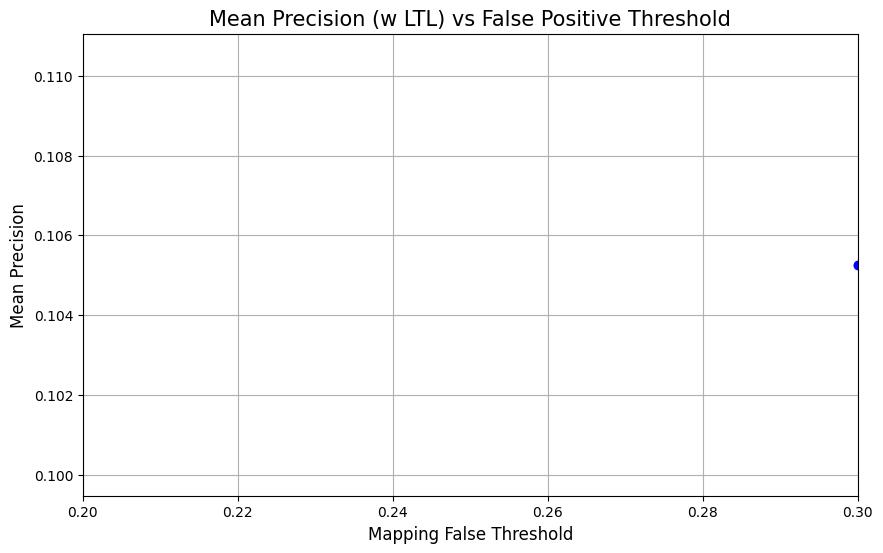

In [53]:
# Grouping by mapping_false_threshold and calculating the mean of precision for each group
grouped_df = df.groupby("mapping_false_threshold")["precision"].mean().reset_index()

# Create a Seaborn line plot with the grouped data
plt.figure(figsize=(10, 6))
sns.lineplot(x="mapping_false_threshold", y="precision", data=grouped_df, marker="o", markersize=8, linewidth=2.5, color='blue')

# Enhancing the plot aesthetics
plt.title('Mean Precision (w LTL) vs False Positive Threshold', fontsize=15)
plt.xlabel('Mapping False Threshold', fontsize=12)
plt.ylabel('Mean Precision', fontsize=12)
plt.grid(True)

# Set x-axis limits to be reversed
plt.xlim(0.2, 0.3)

# Display the plot
plt.show()


In [ ]:
# Grouping by mapping_false_threshold and calculating the mean of precision for each group
grouped_df = df.groupby("mapping_false_threshold")["accuracy"].mean().reset_index()

# Create a Seaborn line plot with the grouped data
plt.figure(figsize=(10, 6))
sns.lineplot(x="mapping_false_threshold", y="accuracy", data=grouped_df, marker="o", markersize=8, linewidth=2.5, color='blue')

# Enhancing the plot aesthetics
plt.title('Mean Accuracy (w LTL) vs False Positive Threshold', fontsize=15)
plt.xlabel('Mapping False Threshold', fontsize=12)
plt.ylabel('Mean Accuracy', fontsize=12)
plt.grid(True)

# Set x-axis limits to be reversed
plt.xlim(0.2, 0.3)

# Display the plot
plt.show()


In [ ]:
# Grouping by mapping_false_threshold and calculating the mean of precision for each group
grouped_df = df.groupby("mapping_false_threshold")["recall"].mean().reset_index()

# Create a Seaborn line plot with the grouped data
plt.figure(figsize=(10, 6))
sns.lineplot(x="mapping_false_threshold", y="recall", data=grouped_df, marker="o", markersize=8, linewidth=2.5, color='blue')

# Enhancing the plot aesthetics
plt.title('Recall vs Mapping False Threshold with Seaborn', fontsize=15)
plt.xlabel('Mapping False Threshold', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.grid(True)

# Set x-axis limits to be reversed
plt.xlim(0, 1)

# Display the plot
plt.show()


In [ ]:
# Grouping by mapping_false_threshold and calculating the mean of precision and recall for each group
grouped_df = df.groupby("mapping_false_threshold")[["precision", "recall"]].mean().reset_index()

# Create a Seaborn scatter plot with the grouped data
plt.figure(figsize=(10, 6))
sns.scatterplot(x="recall", y="precision", data=grouped_df, hue="mapping_false_threshold", palette="viridis", s=100)

# Enhancing the plot aesthetics
plt.title('Mean Precision vs Recall with Seaborn', fontsize=15)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Mean Precision', fontsize=12)
plt.grid(True)

# Display the plot
plt.show()
